In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv('customer_churn_data.csv')

In [108]:
# top 5 data
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [110]:
## Checking the null values
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [111]:
df.shape

(1000, 10)

In [112]:
# Filling the null values because cant remove them 
df['InternetService'] = df['InternetService'].fillna("")

In [113]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [114]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [115]:
## Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [116]:
## Statisitical summarry of the data
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [117]:
numeric_columns_data = df.select_dtypes(include=['number'])

In [118]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


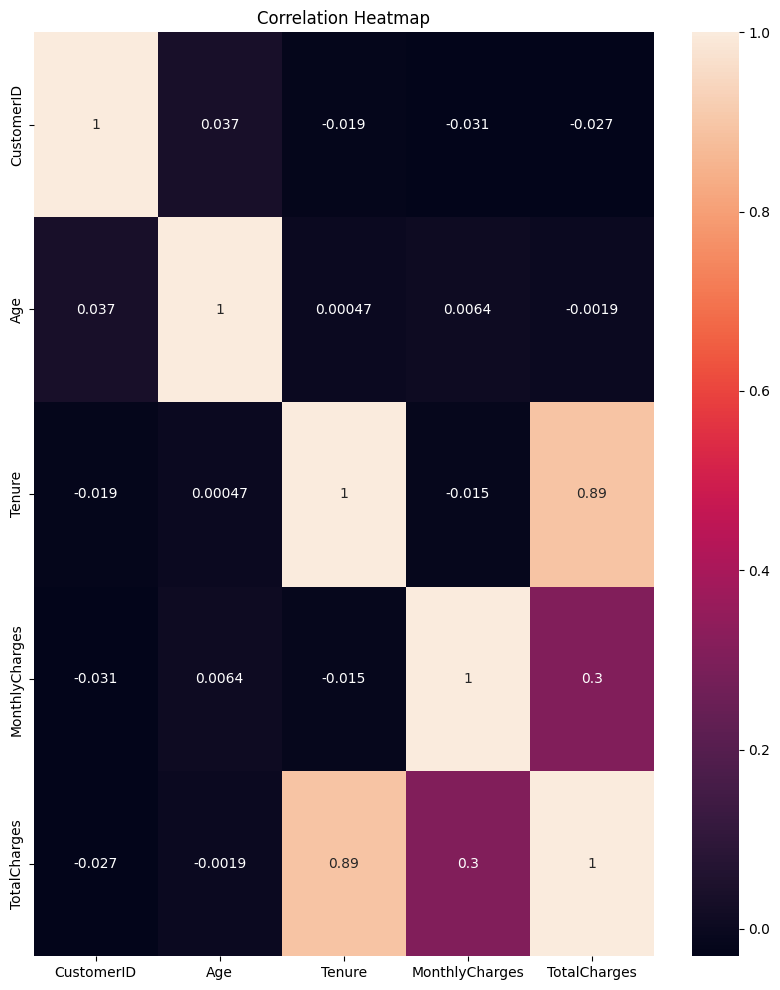

In [119]:
plt.figure(figsize=(10, 12))
sns.heatmap(numeric_columns_data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

Tenure is highly correlated with total charges but they are not giving more information

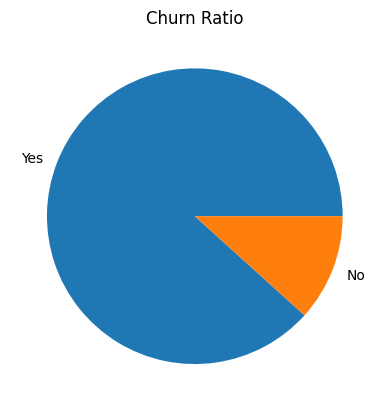

In [120]:
df['Churn'].value_counts().plot(kind='pie')
plt.title('Churn Ratio')
plt.ylabel("")
plt.show()

In [121]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

* customers who churn pays an average of 75 per month 
* customer who did not churn pays an average of 62 per month

In [122]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [123]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

* customer who churn stayed for 17 months
* customer who did not churn stays for 12 months

In [124]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [125]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

* there is no difference in average age of customer who churn or not

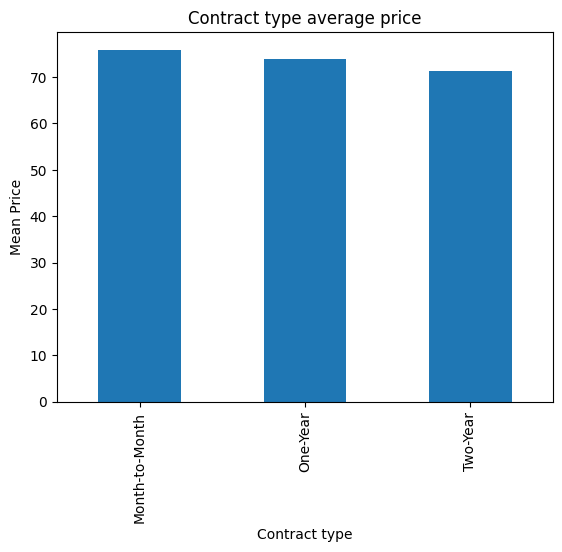

In [126]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind = "bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract type")
plt.title("Contract type average price")
plt.show()

* all the contract type of customer pays approx same amount on monthly basis

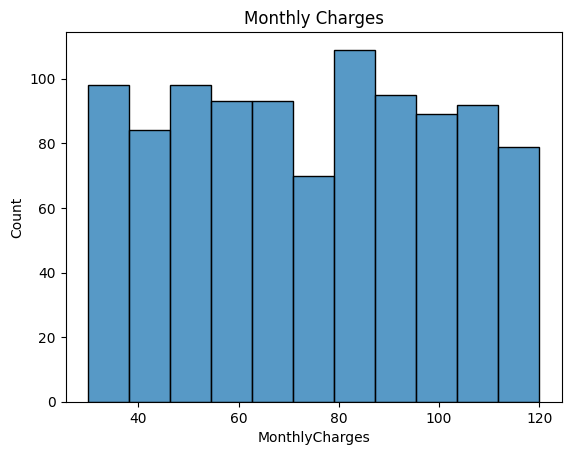

In [127]:
sns.histplot(df['MonthlyCharges'])
plt.title("Monthly Charges")
plt.show()

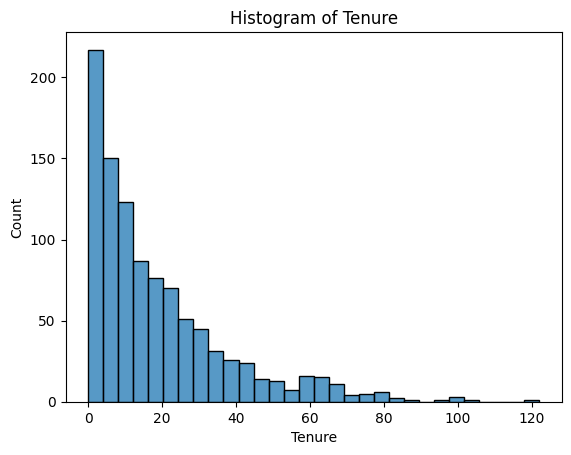

In [128]:
sns.histplot(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

# Feature Engineering

In [129]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [130]:
y = df[['Churn']]
X = df[["Age","Gender","Tenure","MonthlyCharges"]]

In [131]:
X['Gender'].head()

0      Male
1      Male
2    Female
3    Female
4      Male
Name: Gender, dtype: object

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
X['Gender'] = LabelEncoder().fit_transform(X['Gender'])

C:\Users\princ\AppData\Local\Temp\ipykernel_21928\2351645343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = LabelEncoder().fit_transform(X['Gender'])


In [134]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,1,4,88.35
1,43,1,0,36.67
2,51,0,2,63.79
3,60,0,8,102.34
4,42,1,32,69.01


In [135]:
type(X["Gender"][0])

numpy.int64

In [136]:
y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

C:\Users\princ\AppData\Local\Temp\ipykernel_21928\3691775968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [139]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,1,4,88.35
1,43,1,0,36.67
2,51,0,2,63.79
3,60,0,8,102.34
4,42,1,32,69.01
...,...,...,...,...
995,42,1,41,37.14
996,62,1,9,80.93
997,51,0,15,111.72
998,39,1,68,65.67


In [140]:
## Scaling the data
from sklearn.preprocessing import StandardScaler


In [141]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [142]:
import joblib
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [144]:
X_test = scaler.fit_transform(X_test)

In [148]:
X_test.shape

(200, 4)

In [149]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test,predictions)))

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [152]:
import warnings
warnings.filterwarnings("ignore")

In [153]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [156]:
y_pred = log_model.predict(X_test)

In [157]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [170]:
from sklearn.neighbors import KNeighborsClassifier

In [171]:
param_grid = {
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
    
}

In [172]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid,cv = 5)

In [173]:
gridkn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [174]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [ ]:
y_pred = gridkn.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [176]:
modelperformance(y_pred)

Accuracy score on model is 0.73


Logistic Regression performs better than k neighbours 

In [177]:
from sklearn.svm import SVC

In [178]:
svm = SVC()

In [179]:
param_grid = {
    "C":[0.01,0.1,0.5,1],
    "kernel":["linear","poly","rbf","sigmoid"]
}

In [180]:
gridsvc = GridSearchCV(svm,param_grid,cv = 5)

In [181]:
gridsvc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [182]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [183]:
y_pred = gridsvc.predict(X_test)

In [184]:
modelperformance(y_pred)

Accuracy score on model is 0.885


It is same as of logistic regression and better than k neighbour

In [185]:
from sklearn.tree import DecisionTreeClassifier

In [186]:
param_grid = {
    "criterion":["gini","entropy"],
    "max_depth":[None,10,20,30],
    "splitter":["best","random"],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [187]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid,cv = 5)

In [188]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [189]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [191]:
y_pred = grid_tree.predict(X_test)

In [192]:
modelperformance(y_pred)

Accuracy score on model is 0.865


In [193]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [194]:
param_grid={
    "n_estimators":[32,64,128,256],
    "max_features":[2,3,4],
    "bootstrap":[True,False]
}

In [195]:
grid_rfc = GridSearchCV(rfc_model,param_grid,cv = 5)

In [196]:
grid_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [197]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [198]:
y_pred = grid_rfc.predict(X_test)

In [199]:
modelperformance(y_pred)

Accuracy score on model is 0.87


we get best performnce in logistic regression as svm. lets take svm as our best performer

In [200]:
best_model = gridsvc.best_estimator_

In [201]:
joblib.dump(best_model,'model.pkl')

['model.pkl']

In [202]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')